In [1]:
from pathlib import Path
import os
home_dir = Path(".").resolve().parent
data_dir = str(home_dir)+'\Data'

In [3]:
os.chdir(data_dir)

In [4]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Data set is already in 2 separate files; one training set and one testing set. Will only pull in training set at first.

This data was obtained from the UCI Machine Learning Repository at this url: https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

In [5]:
data= pd.read_csv('drugsComTrain_raw.tsv', sep='\t')

In [6]:
print(data.shape)
data.head()

(161297, 7)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [7]:
data= data.drop('Unnamed: 0', axis=1)
print(data.shape)
data.head()

(161297, 6)


,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [8]:
#check data types
data.dtypes

drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [9]:
#check for any NAs
data.isnull().sum()

drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

Nulls were only found in the condition column. Will look into the rows that have the null values to determine what to do with the rows or columns.

In [10]:
#look at first 25 null values
data[data['condition'].isna()][:25]

,drugName,condition,review,rating,date,usefulCount
30,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10.0,"August 18, 2010",1
148,Urea,NaN,"""Accurate information.""",10.0,"July 2, 2011",13
488,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10.0,"October 20, 2010",25
733,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8.0,"January 24, 2011",1
851,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6.0,"March 23, 2017",1
1014,Acetaminophen / caffeine,NaN,"""I get migraine and have found out by taking e...",10.0,"February 19, 2012",7
1124,Tavaborole,NaN,"""I have struggled with nail for 8 or ten years...",10.0,"May 21, 2016",6
1163,Acetaminophen / butalbital / caffeine / codeine,NaN,"""I found that while this medicine does relieve...",5.0,"December 11, 2011",3
1253,Ethinyl estradiol / norethindrone,NaN,"""I started Loestrin and within two months I ex...",4.0,"April 28, 2011",0
1267,Conjugated estrogens,NaN,"""I had to have a total hysterectomy in 2009 in...",10.0,"June 11, 2016",27


In [11]:
#Look into types of conditions in data set
data['condition'].unique()[:75]

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

The conditions are a mix of chronic and acute conditions. Medications are sometimes not directly linked to specific conditions or they are used to treat multiple. There is also the case where a diagnosis is unknown, but medications are prescribed to help with symptoms and to see if it will help a patient's symptoms.

There is also the possibility that some people may not have wanted to list their conditions when leaving a medication review.

For these reasons, will fill any null values with "Unknown' as a category as there is still a review, medication name, and rating available.

There are also statements that are classified as conditions, but are not. This could have been mistakingly placed due to the language within them. Could possibly be from parsing data from the original source of the data.

Will also fill any columns with these statements with "Unknown" since they have needed information.

In [15]:
data['condition']= data.condition.str.replace(r'(^.*users found this comment helpful.*$)', 'Unknown')
data.shape
#shape did not change

C:\Users\625737\AppData\Local\Temp\ipykernel_33236\2353648449.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['condition']= data.condition.str.replace(r'(^.*users found this comment helpful.*$)', 'Unknown')


(161297, 6)

In [16]:
# will check for empty strings in review
blanks = []

for review in data.itertuples(): 
    if type(review)==str:            
        if review.isspace():         
            blanks.append(i)    

print(blanks)

#no blank spaces in string

[]


In [17]:
print(data['condition'].nunique())
print(data['drugName'].nunique())

812
3436


Will look further into numerical data in the dataset.

In [18]:
data.describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


A majority of the medication satisfaction ratings are above 5/10. Will look at rating distribution.

Text(0, 0.5, 'Frequency')

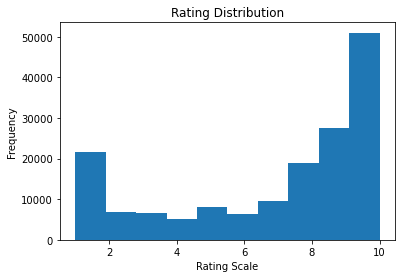

In [19]:
plt.hist(data['rating'])
plt.title('Rating Distribution')
plt.xlabel('Rating Scale')
plt.ylabel('Frequency')

In [20]:
data['rating'].unique()

array([ 9.,  8.,  5.,  2.,  1., 10.,  4.,  3.,  7.,  6.])

In [21]:
data['rating'].value_counts(ascending=True)
#can see that there are very strong reactions

4.0      5012
6.0      6343
3.0      6513
2.0      6931
5.0      8013
7.0      9456
8.0     18890
1.0     21619
9.0     27531
10.0    50989
Name: rating, dtype: int64

In [22]:
data['rating'].value_counts(normalize=True)

10.0    0.316119
9.0     0.170685
1.0     0.134032
8.0     0.117113
7.0     0.058625
5.0     0.049679
2.0     0.042970
3.0     0.040379
6.0     0.039325
4.0     0.031073
Name: rating, dtype: float64

Visualize the more common words in all the reviews to also make note of any words that can be added as a stop word.

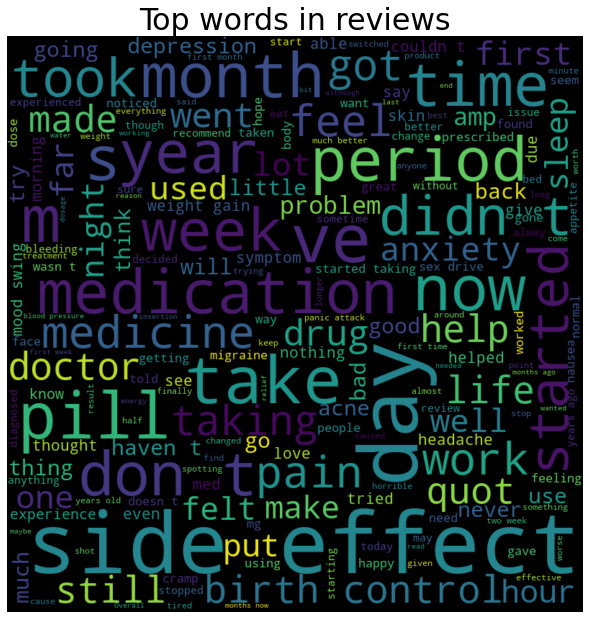

In [23]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()
wordCloud_generator(data['review'], title="Top words in reviews")

The goal of this project is to predict patient satisfaction star rating of specific drugs using patient reviews.

To simplify this, will split the rating into 2 groups; ratings 5 and up as "good" and ratings 4 and below as "bad".

In [24]:
data['rating_split'] = np.where(data['rating'] >=5, 1, 0)

Check balance of new column with the 2 rating classes.

<AxesSubplot:xlabel='rating_split'>

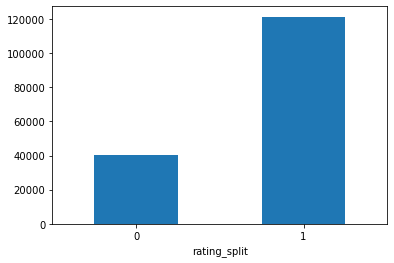

In [25]:
rating= data.groupby(['rating_split']).size()
rating.plot.bar(rot=0)

In [26]:
data['rating_split'].value_counts()

1    121222
0     40075
Name: rating_split, dtype: int64

Data is imbalanced. Will keep this in mind when building the model and also analyzing the metrics.

# TEXT PREPROCESSING

Before building the model,the review column text must be preprocessed.

Spacy is used in this case to tokenize, remove ending punctuation, remove stop words, and lemmatize each words within each review.

In [68]:
import spacy #load spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score
from nltk.corpus import stopwords
from sklearn import metrics

In [30]:
nlp = spacy.load("en_core_web_lg", disable=['parser', 'tagger', 'ner'])
stops = stopwords.words("english")

Use wordcloud above to determine what stop words can be added that do not add much to the meaning or sentiment of reviews.

In [31]:
#add to stop words
nlp.Defaults.stop_words.add('mediction')
nlp.vocab['medication'].is_stop = True

nlp.Defaults.stop_words.add('medicine')
nlp.vocab['medicine'].is_stop = True

nlp.Defaults.stop_words.add('day')
nlp.vocab['day'].is_stop = True

nlp.Defaults.stop_words.add('period')
nlp.vocab['period'].is_stop = True

nlp.Defaults.stop_words.add('month')
nlp.vocab['month'].is_stop = True

nlp.Defaults.stop_words.add('doctor')
nlp.vocab['doctor'].is_stop = True

nlp.Defaults.stop_words.add('now')
nlp.vocab['now'].is_stop = True

nlp.Defaults.stop_words.add('took')
nlp.vocab['took'].is_stop = True

nlp.Defaults.stop_words.add('hour')
nlp.vocab['hour'].is_stop = True

nlp.Defaults.stop_words.add('pill')
nlp.vocab['pill'].is_stop = True

nlp.Defaults.stop_words.add('week')
nlp.vocab['week'].is_stop = True

Create loop to iterate through each review using Spacy and Spacy.tokens attributes

In [32]:
def cleanData(doc, stemming = False):
    doc = doc.lower()
    doc = nlp(doc)
    tokens = [tokens.lower_ for tokens in doc]
    tokens = [tokens for tokens in doc if (tokens.is_stop == False)]
    tokens = [tokens for tokens in tokens if (tokens.is_punct == False)]
    tokens = [tokens for tokens in tokens if (tokens.is_right_punct == False)]
    tokens = [tokens for tokens in tokens if (tokens.is_left_punct == False)]
    final_token = [token.lemma_ for token in tokens]
    return " ".join(final_token)

In [33]:
cleanData(data['review'][1])

C:\Users\625737\Anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


'son halfway fourth intuniv concerned began started taking highest dose days hardly bed cranky slept nearly 8 hours drive home school vacation unusual called monday morning said stick days school getting morning days problem free agreeable emotional good thing cranky remembering things overall behavior better \r\n tried different medications far effective'

Special characters are still included within each review. Will leave in since there are some emojis in the reviews.

In [34]:
#apply loop to review data
data['review'] = data['review'].map(lambda x: cleanData(x))

Visualize most common words in positive and negative reviews separately

Assign y_train to rating_split data as this is what will be predicted. X_train will be defined after review data is vectorized

In [37]:
y_train= data['rating_split']

# Tf-idf

Use TF-IDF to vectorize training set review words and fit tf-idf vectorizer to training set

In [38]:
def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

Ignore terms that have a frequency greater than 95% and lower than 5.

In [39]:
tfidf_vect= TfidfVectorizer(max_df=0.95, min_df=5, analyzer=cleanData)
tfidf_vect_fit=tfidf_vect.fit(data['review'])
X_train=vectorize(data['review'],tfidf_vect_fit)

C:\Users\625737\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
X_train

,\t,\n,\r,!,#,$,%,&,(,),...,y,z,|,~,​,☹,☺,♡,❤,️
0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.205126,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.124419,0.124419,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.385346,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.109185,0.109185,0.0,0.100712,0.0,0.0,0.098496,0.0,0.0,...,0.263017,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.088896,0.0,0.0,0.086940,0.0,0.0,...,0.265323,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.170782,0.0,0.0,0.167024,0.0,0.0,...,0.382294,0.066971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161292,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.060789,0.0,0.0,...,0.139138,0.097498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161293,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.095169,0.0,0.0,...,0.363046,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161294,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161295,0.0,0.098846,0.098846,0.0,0.182350,0.0,0.0,0.178337,0.0,0.0,...,0.408188,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Prep test data

Read in test data set

In [41]:
test_data= pd.read_csv('drugsComTest_raw.tsv', sep='\t')
print(test_data.shape)
test_data.head()

(53766, 7)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [42]:
test_data= test_data.drop('Unnamed: 0', axis=1)
test_data.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [43]:
test_data['rating_split'] = np.where(test_data['rating'] >=5, True, False)

<AxesSubplot:xlabel='rating_split'>

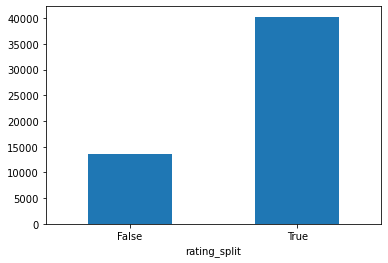

In [44]:
rating= test_data.groupby(['rating_split']).size()
rating.plot.bar(rot=0)

Use cleanData loop created when cleaning training data review column. Leave in special characters like what was done in the training set.

In [45]:
cleanData(test_data['review'][1])

C:\Users\625737\Anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


'son crohn&#039;s disease asacol   complaints shows effects   taken tablets time   i&#039;ve happy results reducing bouts diarrhea drastically'

In [46]:
test_data['review'] = test_data['review'].map(lambda x: cleanData(x))

In [47]:
y_test= test_data['rating_split']

Apply tfidf vectorizer to the text data without refitting the vectorizer to the testing set.

In [48]:
test_tfidf_vect= TfidfVectorizer(max_df=0.95, min_df=5, analyzer=cleanData)
X_test=vectorize(test_data['review'], tfidf_vect_fit)

C:\Users\625737\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
X_test

,\t,\n,\r,!,#,$,%,&,(,),...,y,z,|,~,​,☹,☺,♡,❤,️
0,0.0,0.0,0.0,0.0,0.134299,0.0,0.0,0.131344,0.0,0.0,...,0.300626,0.210657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.279806,0.0,0.0,0.273649,0.0,0.0,...,0.208781,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.243335,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.270242,0.0,0.0,0.264296,0.0,0.0,...,0.201645,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.107015,0.0,0.0,0.104661,0.0,0.0,...,0.199627,0.083930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53761,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.092755,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53762,0.0,0.0,0.0,0.0,0.213683,0.0,0.0,0.208981,0.0,0.0,...,0.223219,0.067035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53763,0.0,0.0,0.0,0.0,0.168508,0.0,0.0,0.164800,0.0,0.0,...,0.209557,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53764,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.104473,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Random Forest

Build Random Forest Model 

In [50]:
rf_model= RandomForestClassifier()

Use GridSearchCV to check for best parameters and also applying k-fold cross validation to improve the model's performance.

In [73]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    for mean, params in zip(means, results.cv_results_['params']):
        print('{} for {}'.format(round(mean, 3), params))

In [74]:
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [None, 2, 10, 20]
}

cv = GridSearchCV(rf_model,parameters, cv=5)
cv.fit(X_train,y_train.values.ravel())
print_results(cv)

BEST PARAMS: {'max_depth': None, 'n_estimators': 100}

0.827 for {'max_depth': None, 'n_estimators': 5}
0.869 for {'max_depth': None, 'n_estimators': 50}
0.869 for {'max_depth': None, 'n_estimators': 100}
0.752 for {'max_depth': 2, 'n_estimators': 5}
0.752 for {'max_depth': 2, 'n_estimators': 50}
0.752 for {'max_depth': 2, 'n_estimators': 100}
0.753 for {'max_depth': 10, 'n_estimators': 5}
0.752 for {'max_depth': 10, 'n_estimators': 50}
0.752 for {'max_depth': 10, 'n_estimators': 100}
0.783 for {'max_depth': 20, 'n_estimators': 5}
0.789 for {'max_depth': 20, 'n_estimators': 50}
0.788 for {'max_depth': 20, 'n_estimators': 100}


In [75]:
rf_model_bestparam= RandomForestClassifier(n_estimators= 100, max_depth= None)
rf_model_bestparam.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

# Test the model

In [76]:
forest_y_predict = rf_model_bestparam.predict(X_test)

Compare predicted values with actual values:

In [77]:
test_data['predicted_rating']= forest_y_predict
test_data_sub= test_data[['review', 'rating', 'rating_split', 'predicted_rating']]
test_data_sub.head(25)

,review,rating,rating_split,predicted_rating
0,i&#039;ve tried antidepressants years citalopr...,10.0,True,1
1,son crohn&#039;s disease asacol complaints s...,8.0,True,1
2,quick reduction symptoms,9.0,True,1
3,contrave combines drugs alcohol smoking opioid...,9.0,True,1
4,birth control cycle reading reviews type simil...,9.0,True,1
5,4 days 2 weeks arms face vaseline lips eyes ...,4.0,False,0
6,i&#039;ve copper coil 3 months excited thought...,6.0,True,1
7,great i&#039;ve 2 weeks 3 headaches went away ...,9.0,True,1
8,ve methadone years currently trying drug ve de...,7.0,True,1
9,years work far getting pregnant experience did...,2.0,False,0


The probability of each predicted value being each class:

In [78]:
forest_y_predict_prob = rf_model_bestparam.predict_proba(X_test) 
print(forest_y_predict_prob[5:])

[[0.71       0.29      ]
 [0.15       0.85      ]
 [0.19       0.81      ]
 ...
 [0.08       0.92      ]
 [0.84       0.16      ]
 [0.12998569 0.87001431]]


A confusion matrix was made to better understand and visualize how well the model did.

[[ 8128  5369]
 [  174 40095]]
0.8969


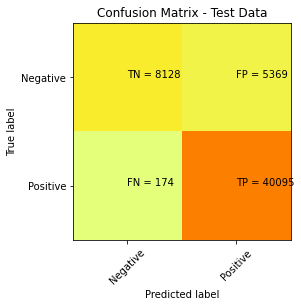

In [79]:
cm_forest = confusion_matrix(y_test, forest_y_predict)
print(cm_forest)
print(round(accuracy_score(y_test, forest_y_predict), 
4))

plt.imshow(cm_forest, interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['Negative', 'Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm_forest[i][j]))
plt.show()

Based on the confusion matrix, the model did fairly well in determining true negatives and true positives especially since the data was imbalanced.

The model shows there is a low chance of a review being falsely labeled as a review with a medication satisfaction rating of 5 and up. This also shows that there is an even lower chance of a review being falsely labeled as a negative review or as a review with a medication satisfaction rating of 4 and below. 

Since the data was imbalanced, the acuracy score does not tell much on how well the model worked.
Instead, will focus more on the precision and recall metrics of the model.

Accuracy:  0.8969051073168918
Precision:  0.8819065634348056
Recall:  0.9956790583327125
F1 score:  0.9353457828374138
F_beta score:  0.902532357906584
Log loss:  0.31604574662143364


C:\Users\625737\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


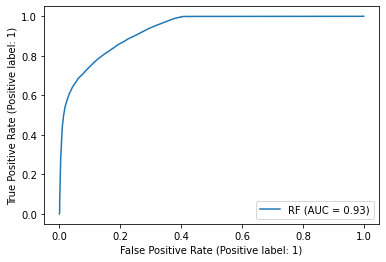

AUC:  0.9293695487606535


In [80]:
forest_accuracy = metrics.accuracy_score(y_test, forest_y_predict)
print('Accuracy: ', forest_accuracy)

forest_precision = metrics.precision_score(y_test, forest_y_predict)
print('Precision: ', forest_precision)

forest_recall = metrics.recall_score(y_test, forest_y_predict)
print('Recall: ', forest_recall)

forest_f1 = metrics.f1_score(y_test, forest_y_predict)
print('F1 score: ', forest_f1)

forest_fbeta = metrics.fbeta_score(y_test, forest_y_predict, beta = 0.5)
print('F_beta score: ', forest_fbeta)


forest_log_loss = metrics.log_loss(y_test, forest_y_predict_prob[:, 1], eps=1e-15)
print ("Log loss: ", forest_log_loss)

rf_roc = metrics.plot_roc_curve(rf_model_bestparam, X_test, y_test, name = "RF")
plt.show()

forest_auc = metrics.roc_auc_score(y_test, forest_y_predict_prob[:, 1])
print("AUC: ", forest_auc)

The AUC (area under the curve) plot shows that the overall performance of the model was high at 93%.